In [2]:
import keras
from keras.datasets import imdb

In [3]:
(Xtrain,ytrain), (Xtest,ytest) = imdb.load_data(num_words=10000)

In [4]:
import numpy as np
def multi_hot_encode(sequences, num_classes):
    results = np.zeros((len(sequences),num_classes))
    for i,sequence in enumerate(sequences):
        results[i][sequence] = 1.0
    return results

In [5]:
Xtrain_encoded = multi_hot_encode(Xtrain,10000)
Xtest_encoded = multi_hot_encode(Xtest,10000)

In [6]:
ytrain_encoded = ytrain.astype('float32')
ytest_encoded = ytest.astype('float32')

In [7]:
from keras import layers

model = keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid'),
])

In [8]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [9]:
history = model.fit(Xtrain_encoded,ytrain_encoded,epochs=20,batch_size=512,validation_split=0.2)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7458 - loss: 0.5494 - val_accuracy: 0.8660 - val_loss: 0.3888
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9056 - loss: 0.2914 - val_accuracy: 0.8882 - val_loss: 0.2850
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9346 - loss: 0.1970 - val_accuracy: 0.8906 - val_loss: 0.2824
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9503 - loss: 0.1535 - val_accuracy: 0.8904 - val_loss: 0.2857
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9619 - loss: 0.1212 - val_accuracy: 0.8840 - val_loss: 0.3016
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9721 - loss: 0.0964 - val_accuracy: 0.8824 - val_loss: 0.3293
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9804 - loss: 0.0752 - val_accuracy: 0.8802 - val_loss: 0.3675
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9862 - loss: 0.0595 - val_accuracy: 0.8770 - val_loss:

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

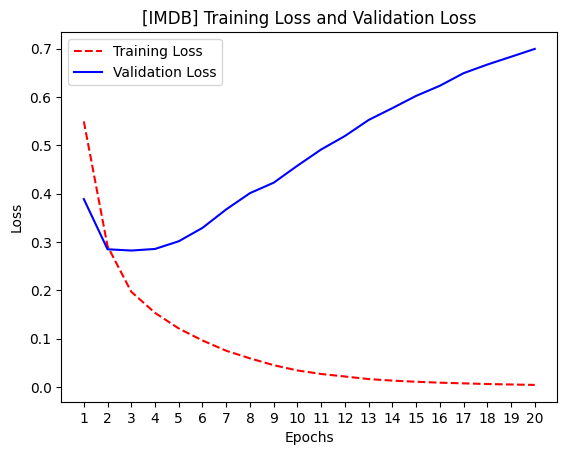

In [11]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'r--',label='Training Loss')
plt.plot(epochs,val_loss_values,'b',label = 'Validation Loss')
plt.xticks(epochs)
plt.title('[IMDB] Training Loss and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

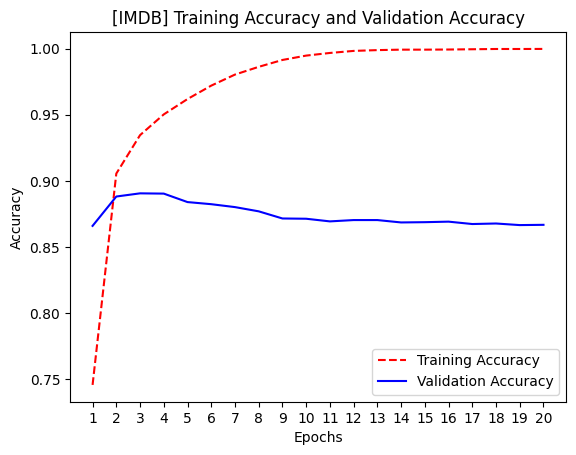

In [12]:
import matplotlib.pyplot as plt

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1,len(acc_values)+1)
plt.plot(epochs,acc_values,'r--',label='Training Accuracy')
plt.plot(epochs,val_acc_values,'b',label = 'Validation Accuracy')
plt.xticks(epochs)
plt.title('[IMDB] Training Accuracy and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

we can clearly see form the graphs that the model is clearly overfitting after 4 epochs, so lets train the model with 4 epochs on the full training set and evaluate it on the test set.


In [13]:
model_final = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model_final.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model_final.fit(Xtrain_encoded,ytrain_encoded,epochs=4,batch_size=512)
results = model_final.evaluate(Xtest_encoded, ytest_encoded)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8060 - loss: 0.4867
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9089 - loss: 0.2513
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9344 - loss: 0.1851
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9492 - loss: 0.1491
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.8799 - loss: 0.3072


In [21]:
results

[0.3420904576778412, 0.8740400075912476]